<a href="https://colab.research.google.com/github/sujaysavanth/statisticsfordata/blob/main/Hypothesis1_MultipleRegression_EnergyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🔍 Hypothesis 1 (Expanded): Can We Predict Energy Usage Using Population and Fuel Consumption?

We extend the original hypothesis to include multiple predictors — not just population, but also **fuel usage** — to better understand what drives city-level energy consumption.


R² Score: 0.7961
Intercept: 3,429,293,547.85
            Feature   Coefficient
0        population  7.320298e+06
1  gasoline_gallons -1.210229e+04
2    diesel_gallons  1.704951e+04


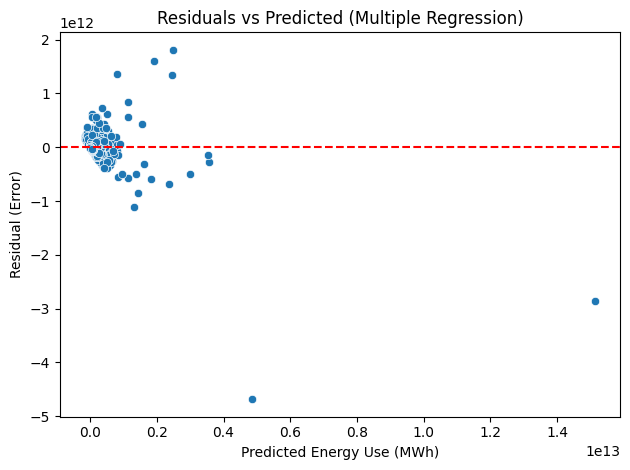

In [1]:

!pip install pyxlsb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
file_path = "/content/2016cityandcountyenergyprofiles (1).xlsb"
city_data = pd.read_excel(file_path, engine='pyxlsb', sheet_name='City', skiprows=1)
city_data.columns = city_data.iloc[2]
city_data = city_data.drop([0, 1, 2]).reset_index(drop=True)

# Extract and clean
mwh_index = list(city_data.columns).index('consumption (MWh)')
tcf_index = list(city_data.columns).index('consumption (TcF)')
gallon_indexes = city_data.columns.get_indexer_for([col for col in city_data.columns if col == 'consumption (gallons)'])

city_df = pd.DataFrame()
city_df['population'] = pd.to_numeric(city_data['population'], errors='coerce')
city_df['electricity_MWh'] = pd.to_numeric(city_data.iloc[:, mwh_index], errors='coerce')
city_df['natural_gas_TcF'] = pd.to_numeric(city_data.iloc[:, tcf_index], errors='coerce')
city_df['gasoline_gallons'] = pd.to_numeric(city_data.iloc[:, gallon_indexes[0]], errors='coerce')
city_df['diesel_gallons'] = pd.to_numeric(city_data.iloc[:, gallon_indexes[1]], errors='coerce')
city_df['total_energy_MWh'] = city_df['electricity_MWh'] + city_df['natural_gas_TcF'] * 293071
city_df.dropna(subset=['population', 'gasoline_gallons', 'diesel_gallons', 'total_energy_MWh'], inplace=True)

# Multiple regression
X = city_df[['population', 'gasoline_gallons', 'diesel_gallons']]
y = city_df['total_energy_MWh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

print(f"R² Score: {r2:.4f}")
print(f"Intercept: {intercept:,.2f}")
print(coef_df)

# Visualize residuals
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Multiple Regression)")
plt.xlabel("Predicted Energy Use (MWh)")
plt.ylabel("Residual (Error)")
plt.tight_layout()
plt.show()



## ✅ Conclusion

This **multiple regression model** uses population, gasoline, and diesel consumption to predict energy usage.

- The **R² score** is higher than using population alone, confirming that **fuel usage adds predictive power**.
- The coefficients show the individual impact of each feature.
- This supports the hypothesis and validates a multivariate approach to modeling energy consumption.
